In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://www.fda.gov/news-events/press-announcements/fda-approves-first-treatment-episodic-cluster-headache-reduces-frequency-attacks"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
# Get the title
title = soup.title
print(title)

<title>FDA approves first treatment for episodic cluster headache that reduces the frequency of attacks | FDA</title>


In [2]:
# Print out the text
text = soup.get_text()
#print(soup.text)

NameError: name 'soup' is not defined

# Pre-Processing

In [7]:
content=soup.find_all('p')

In [8]:
str_cells=str(content)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[The .gov means it’s official.Federal government websites often end in .gov or .mil. Before sharing sensitive information, make sure you're on a federal government site., The site is secure. The https:// ensures that you are connecting to the official website and that any information you provide is encrypted and transmitted securely., FDA News Release, The U.S. Food and Drug Administration today approved Emgality (galcanezumab-gnlm) solution for injection for the treatment of episodic cluster headache in adults. , “Emgality provides patients with the first FDA-approved drug that reduces the frequency of attacks of episodic cluster headache, an extremely painful and often debilitating condition,” said Eric Bastings, M.D., deputy director of the Division of Neurology Products in the FDA’s Center for Drug Evaluation and Research. “The FDA is committed to continuing to work with drug developers to bring treatments for unmet medical needs to patients.”, Cluster headache is a form of headach

In [9]:
Final=pd.DataFrame(data=pd.Series(cleantext))
Final.rename({0: 'Article'}, axis=1, inplace=True)
Final.head()

,Article
0,[The .gov means it’s official.Federal governme...


## Natural Language Processing

In [10]:
import nltk
nltk.download ()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
import nltk, re, pprint
from nltk import word_tokenize,RegexpTokenizer
from textblob import TextBlob

#### Convert to lowercase

In [12]:
Final['Article'] = Final['Article'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Final['Article'].head()

0    [the .gov means it’s official.federal governme...
Name: Article, dtype: object

#### Tokenization

In [13]:
def tokenize_word_text(text): 
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens] 
    return tokens
tokens = [tokenize_word_text(item) for item in Final['Article'].values]
print(tokens)

[['[', 'the', '.gov', 'means', 'it', '’', 's', 'official.federal', 'government', 'websites', 'often', 'end', 'in', '.gov', 'or', '.mil', '.', 'before', 'sharing', 'sensitive', 'information', ',', 'make', 'sure', 'you', "'re", 'on', 'a', 'federal', 'government', 'site.', ',', 'the', 'site', 'is', 'secure', '.', 'the', 'https', ':', '//', 'ensures', 'that', 'you', 'are', 'connecting', 'to', 'the', 'official', 'website', 'and', 'that', 'any', 'information', 'you', 'provide', 'is', 'encrypted', 'and', 'transmitted', 'securely.', ',', 'fda', 'news', 'release', ',', 'the', 'u.s.', 'food', 'and', 'drug', 'administration', 'today', 'approved', 'emgality', '(', 'galcanezumab-gnlm', ')', 'solution', 'for', 'injection', 'for', 'the', 'treatment', 'of', 'episodic', 'cluster', 'headache', 'in', 'adults', '.', ',', '“', 'emgality', 'provides', 'patients', 'with', 'the', 'first', 'fda-approved', 'drug', 'that', 'reduces', 'the', 'frequency', 'of', 'attacks', 'of', 'episodic', 'cluster', 'headache', '

#### Remove Punctuation

In [14]:
tokenizer = RegexpTokenizer("[\w\d\-\s]+",gaps=False)
tokens_punct=tokenizer.tokenize(str(tokens))
print(tokens_punct)

[' ', 'the', ' ', 'gov', ' ', 'means', ' ', 'it', ' ', ' ', 's', ' ', 'official', 'federal', ' ', 'government', ' ', 'websites', ' ', 'often', ' ', 'end', ' ', 'in', ' ', 'gov', ' ', 'or', ' ', 'mil', ' ', ' ', 'before', ' ', 'sharing', ' ', 'sensitive', ' ', 'information', ' ', ' ', 'make', ' ', 'sure', ' ', 'you', ' ', 're', ' ', 'on', ' ', 'a', ' ', 'federal', ' ', 'government', ' ', 'site', ' ', ' ', 'the', ' ', 'site', ' ', 'is', ' ', 'secure', ' ', ' ', 'the', ' ', 'https', ' ', ' ', ' ', 'ensures', ' ', 'that', ' ', 'you', ' ', 'are', ' ', 'connecting', ' ', 'to', ' ', 'the', ' ', 'official', ' ', 'website', ' ', 'and', ' ', 'that', ' ', 'any', ' ', 'information', ' ', 'you', ' ', 'provide', ' ', 'is', ' ', 'encrypted', ' ', 'and', ' ', 'transmitted', ' ', 'securely', ' ', ' ', 'fda', ' ', 'news', ' ', 'release', ' ', ' ', 'the', ' ', 'u', 's', ' ', 'food', ' ', 'and', ' ', 'drug', ' ', 'administration', ' ', 'today', ' ', 'approved', ' ', 'emgality', ' ', ' ', 'galcanezumab-gnl

#### Remove Blanks

In [15]:
def remove_blanc(tokens):
    tokens = [token.strip() for token in tokens]
    return(tokens)
tokens_blanc = remove_blanc(tokens_punct)
print(tokens_blanc)

['', 'the', '', 'gov', '', 'means', '', 'it', '', '', 's', '', 'official', 'federal', '', 'government', '', 'websites', '', 'often', '', 'end', '', 'in', '', 'gov', '', 'or', '', 'mil', '', '', 'before', '', 'sharing', '', 'sensitive', '', 'information', '', '', 'make', '', 'sure', '', 'you', '', 're', '', 'on', '', 'a', '', 'federal', '', 'government', '', 'site', '', '', 'the', '', 'site', '', 'is', '', 'secure', '', '', 'the', '', 'https', '', '', '', 'ensures', '', 'that', '', 'you', '', 'are', '', 'connecting', '', 'to', '', 'the', '', 'official', '', 'website', '', 'and', '', 'that', '', 'any', '', 'information', '', 'you', '', 'provide', '', 'is', '', 'encrypted', '', 'and', '', 'transmitted', '', 'securely', '', '', 'fda', '', 'news', '', 'release', '', '', 'the', '', 'u', 's', '', 'food', '', 'and', '', 'drug', '', 'administration', '', 'today', '', 'approved', '', 'emgality', '', '', 'galcanezumab-gnlm', '', '', 'solution', '', 'for', '', 'injection', '', 'for', '', 'the', ''

#### Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens_blanc]
print(lemmatized_words)

['', 'the', '', 'gov', '', 'mean', '', 'it', '', '', 's', '', 'official', 'federal', '', 'government', '', 'website', '', 'often', '', 'end', '', 'in', '', 'gov', '', 'or', '', 'mil', '', '', 'before', '', 'sharing', '', 'sensitive', '', 'information', '', '', 'make', '', 'sure', '', 'you', '', 're', '', 'on', '', 'a', '', 'federal', '', 'government', '', 'site', '', '', 'the', '', 'site', '', 'is', '', 'secure', '', '', 'the', '', 'http', '', '', '', 'ensures', '', 'that', '', 'you', '', 'are', '', 'connecting', '', 'to', '', 'the', '', 'official', '', 'website', '', 'and', '', 'that', '', 'any', '', 'information', '', 'you', '', 'provide', '', 'is', '', 'encrypted', '', 'and', '', 'transmitted', '', 'securely', '', '', 'fda', '', 'news', '', 'release', '', '', 'the', '', 'u', 's', '', 'food', '', 'and', '', 'drug', '', 'administration', '', 'today', '', 'approved', '', 'emgality', '', '', 'galcanezumab-gnlm', '', '', 'solution', '', 'for', '', 'injection', '', 'for', '', 'the', '', '

#### StopWords

In [46]:
"""
Use a stopwords list
"""
stopword_list = nltk.corpus.stopwords.words('english')

""" 
Create your own stopwords list
"""
stopword_list += ['a', 'about', 'above', 'across', 'after', 'afterwards']
stopword_list += ['again', 'against', 'all', 'almost', 'alone', 'along','']
stopword_list += ['this', 'is', 'your']
stopword_list += ["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
stopword_list += ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]
print("StopWords List in English : \n", stopword_list)


StopWords List in English : 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

In [47]:
Cleaned = [word for word in lemmatized_words if word.lower() not in stopword_list]
print(Cleaned)
print("Length of original list: {0} words\n"
      "Length of list after stopwords removal: {1} words"
      .format(len(lemmatized_words), len(Cleaned)))


['gov', 'official', 'federal', 'government', 'website', 'gov', 'mil', 'sharing', 'sensitive', 'federal', 'government', 'site', 'site', 'secure', 'ensures', 'connecting', 'official', 'website', 'provide', 'encrypted', 'transmitted', 'securely', 'fda', 'news', 'release', 'food', 'drug', 'administration', 'today', 'approved', 'emgality', 'galcanezumab-gnlm', 'solution', 'injection', 'treatment', 'episodic', 'cluster', 'headache', 'adult', 'emgality', 'patient', 'fda-approved', 'drug', 'reduces', 'frequency', 'attack', 'episodic', 'cluster', 'headache', 'extremely', 'painful', 'debilitating', 'condition', 'eric', 'basting', 'deputy', 'director', 'division', 'neurology', 'product', 'fda', 'center', 'drug', 'evaluation', 'fda', 'committed', 'continuing', 'work', 'drug', 'developer', 'bring', 'treatment', 'unmet', 'medical', 'patient', 'cluster', 'headache', 'form', 'headache', 'produce', 'extreme', 'pain', 'occur', 'cluster', 'time', 'day', 'week', 'month', 'headache', 'accompanied', 'sympto

#### Remove words of length less than 4

In [80]:
doc = [w.strip() for w in Cleaned if len(w.strip()) >= 4]
print(doc)

['official', 'federal', 'government', 'website', 'sharing', 'sensitive', 'federal', 'government', 'site', 'site', 'secure', 'ensures', 'connecting', 'official', 'website', 'provide', 'encrypted', 'transmitted', 'securely', 'news', 'release', 'food', 'drug', 'administration', 'today', 'approved', 'emgality', 'galcanezumab-gnlm', 'solution', 'injection', 'treatment', 'episodic', 'cluster', 'headache', 'adult', 'emgality', 'patient', 'fda-approved', 'drug', 'reduces', 'frequency', 'attack', 'episodic', 'cluster', 'headache', 'extremely', 'painful', 'debilitating', 'condition', 'eric', 'basting', 'deputy', 'director', 'division', 'neurology', 'product', 'center', 'drug', 'evaluation', 'committed', 'continuing', 'work', 'drug', 'developer', 'bring', 'treatment', 'unmet', 'medical', 'patient', 'cluster', 'headache', 'form', 'headache', 'produce', 'extreme', 'pain', 'occur', 'cluster', 'time', 'week', 'month', 'headache', 'accompanied', 'symptom', 'include', 'bloodshot', 'excessive', 'tearing

#### POS Tagging

In [81]:
article=nltk.pos_tag(doc)

In [82]:
print(article)

[('official', 'JJ'), ('federal', 'JJ'), ('government', 'NN'), ('website', 'NN'), ('sharing', 'VBG'), ('sensitive', 'JJ'), ('federal', 'JJ'), ('government', 'NN'), ('site', 'NN'), ('site', 'NN'), ('secure', 'NN'), ('ensures', 'VBZ'), ('connecting', 'VBG'), ('official', 'JJ'), ('website', 'JJ'), ('provide', 'NN'), ('encrypted', 'VBD'), ('transmitted', 'VBD'), ('securely', 'RB'), ('news', 'NN'), ('release', 'NN'), ('food', 'NN'), ('drug', 'NN'), ('administration', 'NN'), ('today', 'NN'), ('approved', 'VBD'), ('emgality', 'JJ'), ('galcanezumab-gnlm', 'JJ'), ('solution', 'NN'), ('injection', 'NN'), ('treatment', 'NN'), ('episodic', 'JJ'), ('cluster', 'NN'), ('headache', 'NN'), ('adult', 'NN'), ('emgality', 'NN'), ('patient', 'JJ'), ('fda-approved', 'JJ'), ('drug', 'NN'), ('reduces', 'NNS'), ('frequency', 'VBP'), ('attack', 'RB'), ('episodic', 'JJ'), ('cluster', 'NN'), ('headache', 'NN'), ('extremely', 'RB'), ('painful', 'JJ'), ('debilitating', 'VBG'), ('condition', 'NN'), ('eric', 'JJ'), ('

In [85]:
for i in range(0,1):
   # token_comment = word_tokenize(comment[i])
    tagged_comment = nltk.pos_tag(doc)
    Final_POS=[(word) for word, tag  in tagged_comment if (tag=='FW' or tag=='JJ' or tag=='JJR' or tag=='JJS' or tag=='LS' or tag=='NN' or tag=='NNP' or tag=='NNPS' or tag=='NNS' or tag=='UH')]
    print(Final_POS)

['official', 'federal', 'government', 'website', 'sensitive', 'federal', 'government', 'site', 'site', 'secure', 'official', 'website', 'provide', 'news', 'release', 'food', 'drug', 'administration', 'today', 'emgality', 'galcanezumab-gnlm', 'solution', 'injection', 'treatment', 'episodic', 'cluster', 'headache', 'adult', 'emgality', 'patient', 'fda-approved', 'drug', 'reduces', 'episodic', 'cluster', 'headache', 'painful', 'condition', 'eric', 'deputy', 'director', 'division', 'neurology', 'product', 'center', 'drug', 'evaluation', 'work', 'drug', 'bring', 'treatment', 'unmet', 'medical', 'patient', 'cluster', 'headache', 'form', 'headache', 'extreme', 'pain', 'cluster', 'time', 'week', 'month', 'headache', 'symptom', 'bloodshot', 'excessive', 'eyelid', 'runny', 'nose', 'nasal', 'congestion', 'facial', 'people', 'experience', 'restlessness', 'agitation', 'cluster', 'headache', 'attack', 'strike', 'time', 'minute', 'hour', 'effectiveness', 'emgality', 'treatment', 'episodic', 'cluster'

In [22]:
# Function to extract two pattern tags             
def match2(token_pos,pos1,pos2):
    for subsen in token_pos:
        # avoid index error and catch last three elements
        end = len(subsen) - 1
        for ind, (a, b) in enumerate(subsen, 1):
            if ind == end:
                break
            if b == pos1 and subsen[ind][1] == pos2:
                yield ("{} {}".format(a, subsen[ind][0], subsen[ind + 1][0]))

# Print company and model no for each sentence

for i in range(0,3):
#tokens = word_tokenize(comment[i]) # Generate list of tokens
    tokens_pos = nltk.pos_tag(doc)
    a = [tokens_pos]
    print(list(match2(a,'NN','NN')))

['government site', 'site site', 'site secure', 'secure http', 'information provide', 'news release', 'release food', 'food drug', 'drug administration', 'administration today', 'solution injection', 'injection treatment', 'cluster headache', 'headache adult', 'adult emgality', 'cluster headache', 'deputy director', 'director division', 'division neurology', 'neurology product', 'drug evaluation', 'evaluation research', 'work drug', 'bring treatment', 'need patient', 'patient cluster', 'cluster headache', 'headache form', 'form headache', 'week month', 'month headache', 'agitation cluster', 'cluster headache', 'headache attack', 'emgality treatment', 'cluster headache', 'drug placebo', 'number cluster', 'cluster headache', 'headache week', 'change baseline', 'baseline emgality', 'emgality placebo', 'placebo group', 'period patient', 'cluster headache', 'headache attack', 'attack baseline', 'attack patient', 'patient placebo', 'placebo risk', 'risk hypersensitivity', 'hypersensitivity r

#### WordCloud

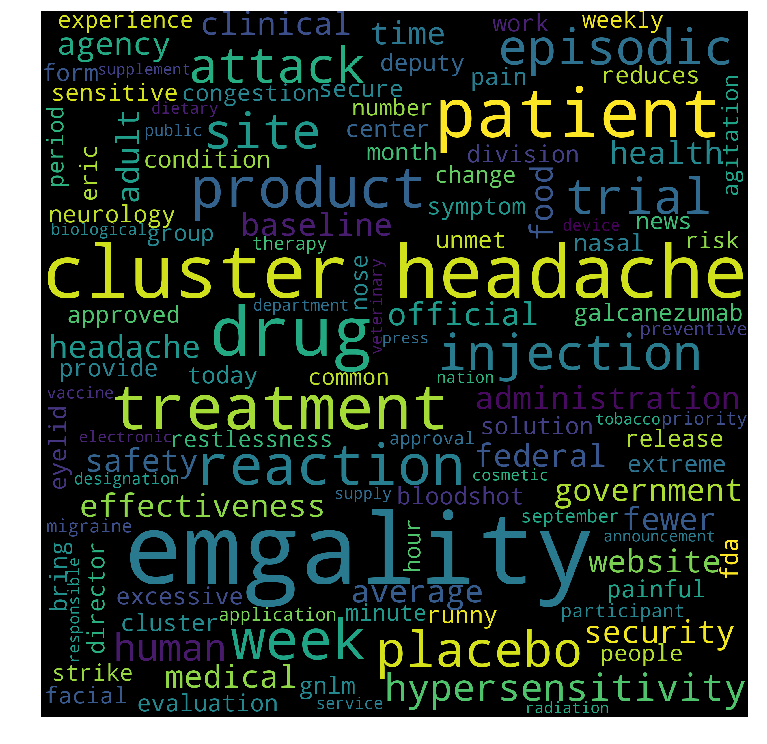

In [86]:
from wordcloud import WordCloud,STOPWORDS
def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = stopword_list,
                         background_color = 'black',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Final_POS)

#### Stemmazation

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()x`
stems = []
for t in Final_POS:    
    stems.append(porter.stem(t))

#### Keyword Extraction

In [52]:
vocabulary = list(set(Final_POS))
print(vocabulary)

['tobacco', 'website', 'administration', 'risk', 'service', 'deputy', 'weekly', 'form', 'congestion', 'hour', 'bloodshot', 'three-week', 'sensitive', 'reduces', 'federal', 'facial', 'vaccine', 'adult', 'fewer', 'symptom', 'headache', 'safety', 'supply', 'period', 'cosmetic', 'restlessness', 'effectiveness', 'september', 'biological', 'application', 'agitation', 'dietary', 'hypersensitivity', 'self-injection', 'announcement', 'week', 'solution', 'average', 'priority', 'month', 'director', 'nation', 'center', 'trial', 'food', 'painful', 'runny', 'device', 'strike', 'preventive', 'security', 'nasal', 'fda-approved', 'excessive', 'common', 'department', 'agency', 'official', 'bring', 'public', 'placebo', 'injection', 'government', 'designation', 'cluster', 'neurology', 'provide', 'treatment', 'electronic', 'eric', 'group', 'veterinary', 'time', 'approval', 'episodic', 'extreme', 'emgality', 'change', 'patient', 'evaluation', 'migraine', 'release', 'supplement', 'pain', 'people', 'medical',

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stopword_list, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(Final_POS)

C:\Users\humapath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [60]:
list(cv.vocabulary_.keys())[:10]

['official',
 'federal',
 'government',
 'website',
 'sensitive',
 'site',
 'secure',
 'provide',
 'news',
 'release']

[Text(0, 0, 'headache'),
 Text(0, 0, 'emgality'),
 Text(0, 0, 'cluster'),
 Text(0, 0, 'drug'),
 Text(0, 0, 'patient'),
 Text(0, 0, 'treatment'),
 Text(0, 0, 'product'),
 Text(0, 0, 'week'),
 Text(0, 0, 'reaction'),
 Text(0, 0, 'site'),
 Text(0, 0, 'injection'),
 Text(0, 0, 'episodic'),
 Text(0, 0, 'attack'),
 Text(0, 0, 'trial'),
 Text(0, 0, 'placebo'),
 Text(0, 0, 'hypersensitivity'),
 Text(0, 0, 'human'),
 Text(0, 0, 'official'),
 Text(0, 0, 'federal'),
 Text(0, 0, 'government')]

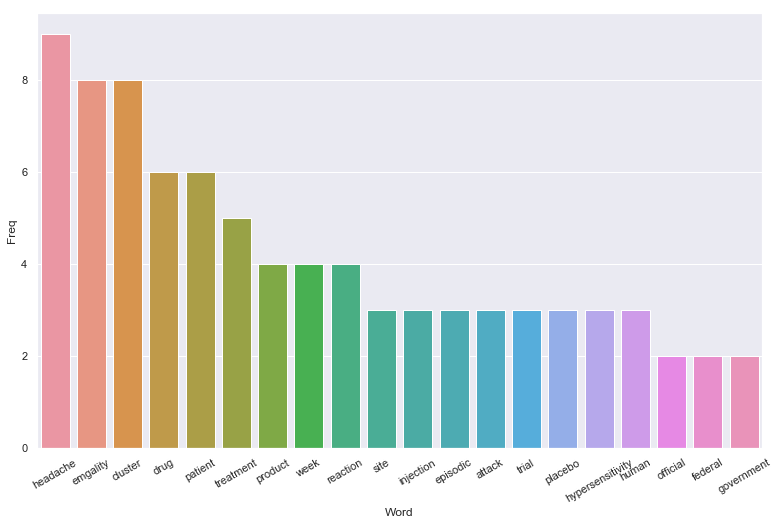

In [67]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(Final_POS, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)


             Bi-gram  Freq
0  galcanezumab gnlm     1
1       fda approved     1
2         three week     1
3     self injection     1


[Text(0, 0, 'galcanezumab gnlm'),
 Text(0, 0, 'fda approved'),
 Text(0, 0, 'three week'),
 Text(0, 0, 'self injection')]

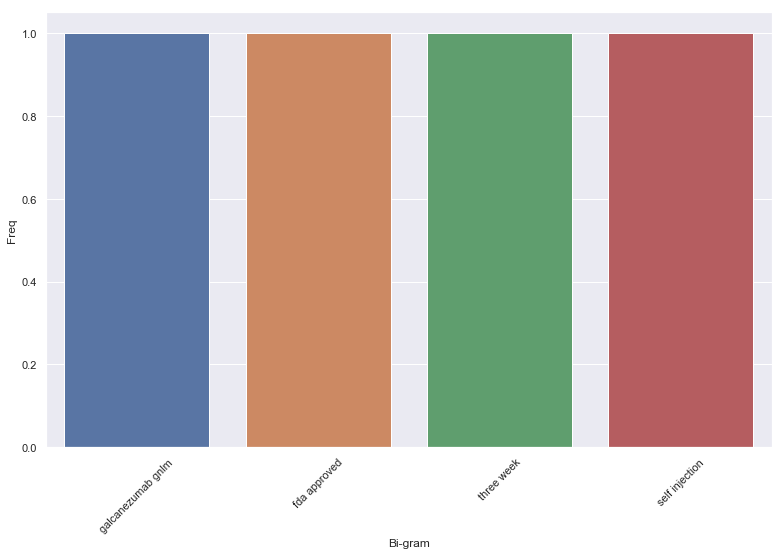

In [65]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(Final_POS, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=str(Final_POS)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [71]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,15)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
['official', 'federal', 'government', 'website', 'sensitive', 'federal', 'government', 'site', 'site', 'secure', 'official', 'website', 'provide', 'news', 'release', 'food', 'drug', 'administration', 'today', 'emgality', 'galcanezumab-gnlm', 'solution', 'injection', 'treatment', 'episodic', 'cluster', 'headache', 'adult', 'emgality', 'patient', 'fda-approved', 'drug', 'reduces', 'episodic', 'cluster', 'headache', 'painful', 'condition', 'eric', 'deputy', 'director', 'division', 'neurology', 'product', 'center', 'drug', 'evaluation', 'work', 'drug', 'bring', 'treatment', 'unmet', 'medical', 'patient', 'cluster', 'headache', 'form', 'headache', 'extreme', 'pain', 'cluster', 'time', 'week', 'month', 'headache', 'symptom', 'bloodshot', 'excessive', 'eyelid', 'runny', 'nose', 'nasal', 'congestion', 'facial', 'people', 'experience', 'restlessness', 'agitation', 'cluster', 'headache', 'attack', 'strike', 'time', 'minute', 'hour', 'effectiveness', 'emgality', 'treatment', 'episodic'

#### Automated Keyword Extraction using RAKE

In [89]:
! pip install news_graph

  Could not find a version that satisfies the requirement news_graph (from versions: )
No matching distribution found for news_graph


In [120]:
from rake_nltk import Metric, Rake

# To use it with a specific language supported by nltk.
r = Rake(language='english')

# If you want to provide your own set of stop words and punctuations to
r = Rake(
    stopwords=stopword_list,
    #punctuations=<string of puntuations to ignore>
)

# If you want to control the metric for ranking. Paper uses d(w)/f(w) as the
# metric. You can use this API with the following metrics:
# 1. d(w)/f(w) (Default metric) Ratio of degree of word to its frequency.
# 2. d(w) Degree of word only.
# 3. f(w) Frequency of word only.

r = Rake(ranking_metric=Metric.DEGREE_TO_FREQUENCY_RATIO)
r = Rake(ranking_metric=Metric.WORD_DEGREE)
r = Rake(ranking_metric=Metric.WORD_FREQUENCY)

# If you want to control the max or min words in a phrase, for it to be
# considered for ranking you can initialize a Rake instance as below:

r = Rake(min_length=2, max_length=4)
r.extract_keywords_from_text(str(Final['Article']))
r.generate_candidate_keyword_scores()

AttributeError: 'Rake' object has no attribute 'generate_candidate_keyword_scores'

In [112]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


In [113]:
def execute(cleanse_method, pages):
    """Execute RAKE and TF-IDF algorithms on each page and output top scoring phrases"""
 
    #1: Initialize a URL reader with local caching to be kind to the internet
    #reader = contentloader.CacheableReader(CACHE_FOLDER, cleanse_method)
 
    #2: Collect raw text for pages
   # processed_pages = []
   # for page in pages:
  #      page_text = reader.get_site_text(page)
    #    processed_pages.append({"url": page, "text": page_text})
 
    #3: RAKE keywords for each page
    rake = RAKE.Rake(stopword_list, min_char_length=2, max_words_length=5)
    rake_results= rake.run(Final['Article'])
 
    #4: TF-IDF keywords for processed text
    document_frequencies = {}
    document_count = len(processed_pages)
    for page in processed_pages:
        page["tfidf_frequencies"] = tfidf.get_word_frequencies(page["text"])
        for word in page["tfidf_frequencies"]:
            document_frequencies.setdefault(word, 0)
            document_frequencies[word] += 1
 
    sortby = lambda x: x[1]["score"]
    for page in processed_pages:
        for word in page["tfidf_frequencies"].items():
            word_frequency = word[1]["frequency"]
            docs_with_word = document_frequencies[word[0]]
            word[1]["score"] = tfidf.calculate(word_frequency, document_count, docs_with_word)
 
        page["tfidf_results"] = sorted(page["tfidf_frequencies"].items(), key=sortby, reverse=True)
 
    #5. TextRank
    for page in processed_pages:
        textrank_results = textrank.extractKeyphrases(page["text"])
        page["textrank_results"] = sorted(textrank_results.items(), key=lambda x: x[1], reverse=True)
 
    #6. Results
    for page in processed_pages:
        # print results output
 
def cleanse_tiernok_html(html):
    """Cleanse function for tiernok.com blog posts"""
   # ... BeautifulSoup Logic here ...
 
# get links because I'm too lazy to copy/pasta
def get_test_links():
    # ... Logic to scrap post archive links here ...
 
# run algorithms with the cleanse method above for the gathered list of links
test_links = get_test_links()[:50]
execute(cleanse_tiernok_html, test_links)


ModuleNotFoundError: No module named 'rake'

In [122]:
import re
import operator

def is_number(s):
    try:
        float(s) if '.' in s else int(s)
        return True
    except ValueError:
        return False


def load_stop_words(stop_word_file):
    """
    Utility function to load stop words from a file and return as a list of words
    @param stop_word_file Path and file name of a file containing stop words.
    @return list A list of stop words.
    """
    stop_words = []
    for line in open(stop_word_file):
        if line.strip()[0:1] != "#":
            for word in line.split():  # in case more than one per line
                stop_words.append(word)
    return stop_words


def separate_words(text, min_word_return_size):
    """
    Utility function to return a list of all words that are have a length greater than a specified number of characters.
    @param text The text that must be split in to words.
    @param min_word_return_size The minimum no of characters a word must have to be included.
    """
    splitter = re.compile('[^a-zA-Z0-9_\\+\\-/]')
    words = []
    for single_word in splitter.split(text):
        current_word = single_word.strip().lower()
        # leave numbers in phrase, but don't count as words, since they tend to invalidate scores of their phrases
        if len(current_word) > min_word_return_size and current_word != '' and not is_number(current_word):
            words.append(current_word)
    return words


def split_sentences(text):
    """
    Utility function to return a list of sentences.
    @param text The text that must be split in to sentences.
    """
    sentence_delimiters = re.compile(u'[.!?,;:\t\\\\"\\(\\)\\\'\u2019\u2013]|\\s\\-\\s')
    sentences = sentence_delimiters.split(text)
    return sentences


def build_stop_word_regex(stop_word_file_path):
    stop_word_list = load_stop_words(stop_word_file_path)
    stop_word_regex_list = []
    for word in stop_word_list:
        word_regex = r'\b' + word + r'(?![\w-])'
        stop_word_regex_list.append(word_regex)
    stop_word_pattern = re.compile('|'.join(stop_word_regex_list), re.IGNORECASE)
    return stop_word_pattern


def generate_candidate_keywords(sentence_list, stopword_pattern, min_char_length=1, max_words_length=5):
    phrase_list = []
    for s in sentence_list:
        tmp = re.sub(stopword_pattern, '|', s.strip())
        phrases = tmp.split("|")
        for phrase in phrases:
            phrase = phrase.strip().lower()
            if phrase != "" and is_acceptable(phrase, min_char_length, max_words_length):
                phrase_list.append(phrase)
    return phrase_list

def is_acceptable(phrase, min_char_length, max_words_length):
    # a phrase must have a min length in characters
    if len(phrase) < min_char_length:
        return 0

    # a phrase must have a max number of words
    words = phrase.split()
    if len(words) > max_words_length:
        return 0

    digits = 0
    alpha = 0
    for i in range(0, len(phrase)):
        if phrase[i].isdigit():
            digits += 1
        elif phrase[i].isalpha():
            alpha += 1

    # a phrase must have at least one alpha character
    if alpha == 0:
        return 0

    # a phrase must have more alpha than digits characters
    if digits > alpha:
        return 0
    return 1

def calculate_word_scores(phraseList):
    word_frequency = {}
    word_degree = {}
    for phrase in phraseList:
        word_list = separate_words(phrase, 0)
        word_list_length = len(word_list)
        word_list_degree = word_list_length - 1
        for word in word_list:
            word_frequency.setdefault(word, 0)
            word_frequency[word] += 1
            word_degree.setdefault(word, 0)
            word_degree[word] += word_list_degree
    for item in word_frequency:
        word_degree[item] = word_degree[item] + word_frequency[item]

    # Calculate Word scores = deg(w)/frew(w)
    word_score = {}
    for item in word_frequency:
        word_score.setdefault(item, 0)
        word_score[item] = word_degree[item] / (word_frequency[item] * 1.0)
    return word_score


def generate_candidate_keyword_scores(phrase_list, word_score, min_keyword_frequency=1):
    keyword_candidates = {}
    for phrase in phrase_list:
        if min_keyword_frequency > 1:
            if phrase_list.count(phrase) < min_keyword_frequency:
                continue
        keyword_candidates.setdefault(phrase, 0)
        word_list = separate_words(phrase, 0)
        candidate_score = 0
        for word in word_list:
            candidate_score += word_score[word]
        keyword_candidates[phrase] = candidate_score
    return keyword_candidates


class Rake(object):
    def __init__(self, stop_words_path, min_char_length=1, max_words_length=5, min_keyword_frequency=1):
        self.__stop_words_path = stop_words_path
        self.__stop_words_pattern = build_stop_word_regex(stop_words_path)
        self.__min_char_length = min_char_length
        self.__max_words_length = max_words_length
        self.__min_keyword_frequency = min_keyword_frequency

    def run(self, text):
        sentence_list = split_sentences(text)

        phrase_list = generate_candidate_keywords(sentence_list, \
                                                  self.__stop_words_pattern, \
                                                  self.__min_char_length, \
                                                  self.__max_words_length)

        word_scores = calculate_word_scores(phrase_list)

        keyword_candidates = generate_candidate_keyword_scores(phrase_list, word_scores, self.__min_keyword_frequency)

        sorted_keywords = sorted(keyword_candidates.items(), key=operator.itemgetter(1), reverse=True)
        return sorted_keywords

In [131]:
import RAKE
import operator

# Reka setup with stopword directory
#stop_dir = "SmartStoplist.txt"
rake_object = RAKE.Rake(stopword_list)

# Sample text to test RAKE
text = """Google quietly rolled out a new way for Android users to listen 
to podcasts and subscribe to shows they like, and it already works on 
your phone. Podcast production company Pacific Content got the exclusive 
on it.This text is taken from Google news."""

# Extract keywords
keywords = rake_object.run(str(Final_POS))
print ("keywords: ", keywords)

keywords:  [('galcanezumab-gnlm', 4.0), ('fda-approved', 4.0), ('self-injection', 3.333333333333333), ('three-week', 3.25), ('injection', 1.3333333333333333), ('week', 1.25), ('official', 1.0), ('federal', 1.0), ('government', 1.0), ('website', 1.0), ('sensitive', 1.0), ('site', 1.0), ('secure', 1.0), ('provide', 1.0), ('news', 1.0), ('release', 1.0), ('food', 1.0), ('drug', 1.0), ('administration', 1.0), ('today', 1.0), ('emgality', 1.0), ('solution', 1.0), ('treatment', 1.0), ('episodic', 1.0), ('cluster', 1.0), ('headache', 1.0), ('adult', 1.0), ('patient', 1.0), ('reduces', 1.0), ('painful', 1.0), ('condition', 1.0), ('eric', 1.0), ('deputy', 1.0), ('director', 1.0), ('division', 1.0), ('neurology', 1.0), ('product', 1.0), ('center', 1.0), ('evaluation', 1.0), ('work', 1.0), ('bring', 1.0), ('unmet', 1.0), ('medical', 1.0), ('form', 1.0), ('extreme', 1.0), ('pain', 1.0), ('time', 1.0), ('month', 1.0), ('symptom', 1.0), ('bloodshot', 1.0), ('excessive', 1.0), ('eyelid', 1.0), ('runn